## Markov Chain Analysis of Rose Bengal Tracer Movement

In [2]:
import numpy as np
import pandas as pd

# Step 1: Define the transition matrix
states = ['U (Urine)', 'F (Feces)', 'B (Blood)', 'L (Liver)']
P = np.array([
    [1.0, 0.0, 0.0, 0.0],      # U (absorbing)
    [0.0, 1.0, 0.0, 0.0],      # F (absorbing)
    [0.0204, 0.0, 0.6373, 0.3423],  # B
    [0.0, 0.0101, 0.0377, 0.9522]   # L
])

# Step 2: Display the transition matrix using a DataFrame
transition_df = pd.DataFrame(P, index=states, columns=states)
print("Transition Matrix (P):")
print(transition_df)

# Step 3: Extract Q and R matrices
# Transient states: B (index 2), L (index 3)
# Absorbing states: U (index 0), F (index 1)
Q = P[2:, 2:]  # Transient to transient
R = P[2:, :2]  # Transient to absorbing

# Step 4: Compute the fundamental matrix N = (I - Q)^-1
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)

# Step 5: Expected time before absorption = sum of rows of N
expected_times = N.sum(axis=1)

# Step 6: Absorption probabilities: B = N * R
B_matrix = N @ R

# Step 7: Display results using a DataFrame
results_df = pd.DataFrame({
    "Expected Hours Before Absorption": expected_times,
    "Probability of Ending in U (Urine)": B_matrix[:, 0],
    "Probability of Ending in F (Feces)": B_matrix[:, 1]
}, index=["B (Blood)", "L (Liver)"])

print("\nResults:")
print(results_df)

Transition Matrix (P):
           U (Urine)  F (Feces)  B (Blood)  L (Liver)
U (Urine)     1.0000     0.0000     0.0000     0.0000
F (Feces)     0.0000     1.0000     0.0000     0.0000
B (Blood)     0.0204     0.0000     0.6373     0.3423
L (Liver)     0.0000     0.0101     0.0377     0.9522

Results:
           Expected Hours Before Absorption  \
B (Blood)                         88.012003   
L (Liver)                         90.335826   

           Probability of Ending in U (Urine)  \
B (Blood)                            0.220001   
L (Liver)                            0.173515   

           Probability of Ending in F (Feces)  
B (Blood)                            0.779999  
L (Liver)                            0.826485  


## Graph Visualization

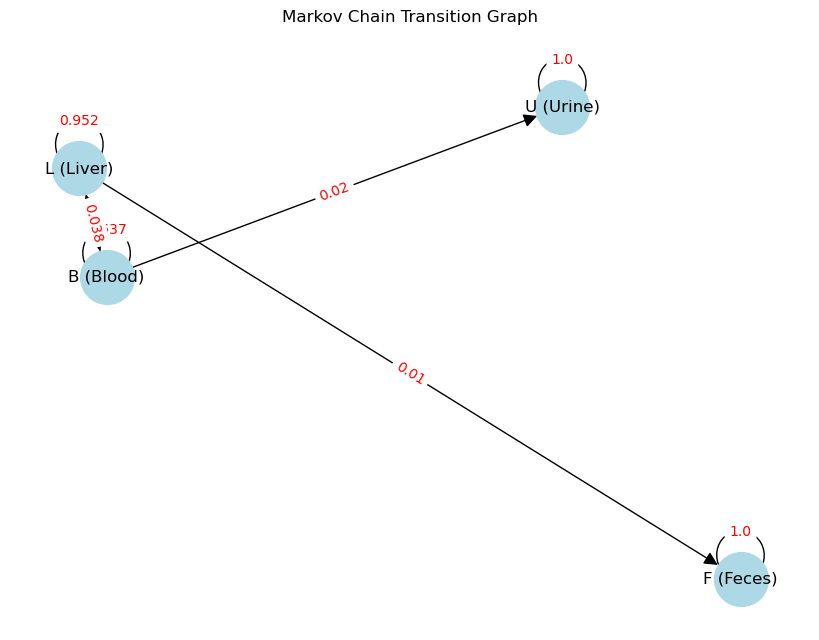

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


# Create directed graph
G = nx.DiGraph()

# Add edges with weights
for i, from_state in enumerate(states):
    for j, to_state in enumerate(states):
        prob = P[i][j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=round(prob, 3))

# Define layout and draw
pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=12, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Markov Chain Transition Graph")
plt.show()
